In [1]:
from sklearn.datasets import load_diabetes
import pandas as pd
diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
# print(df)
df["target"] = diabetes.target
print(df.tail())
print(df.info())

          age       sex       bmi        bp        s1        s2        s3  \
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  0.050680 -0.015906  0.017282 -0.037344 -0.013840 -0.024993   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
441 -0.045472 -0.044642 -0.073030 -0.081414  0.083740  0.027809  0.173816   

           s4        s5        s6  target  
437 -0.002592  0.031193  0.007207   178.0  
438  0.034309 -0.018118  0.044485   104.0  
439 -0.011080 -0.046879  0.015491   132.0  
440  0.026560  0.044528 -0.025930   220.0  
441 -0.039493 -0.004220  0.003064    57.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non

In [2]:
df.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
age,1.000000,0.173737,0.185085,0.335427,0.260061,0.219243,-0.075181,0.203841,0.270777,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241013,0.035277,0.142637,-0.379090,0.332115,0.149918,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395415,0.249777,0.261170,-0.366811,0.413807,0.446159,0.388680,0.586450
bp,0.335427,0.241013,0.395415,1.000000,0.242470,0.185558,-0.178761,0.257653,0.393478,0.390429,0.441484
s1,0.260061,0.035277,0.249777,0.242470,1.000000,0.896663,0.051519,0.542207,0.515501,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185558,0.896663,1.000000,-0.196455,0.659817,0.318353,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178761,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257653,0.542207,0.659817,-0.738493,1.000000,0.617857,0.417212,0.430453
s5,0.270777,0.149918,0.446159,0.393478,0.515501,0.318353,-0.398577,0.617857,1.000000,0.464670,0.565883
s6,0.301731,0.208133,0.388680,0.390429,0.325717,0.290600,-0.273697,0.417212,0.464670,1.000000,0.382483


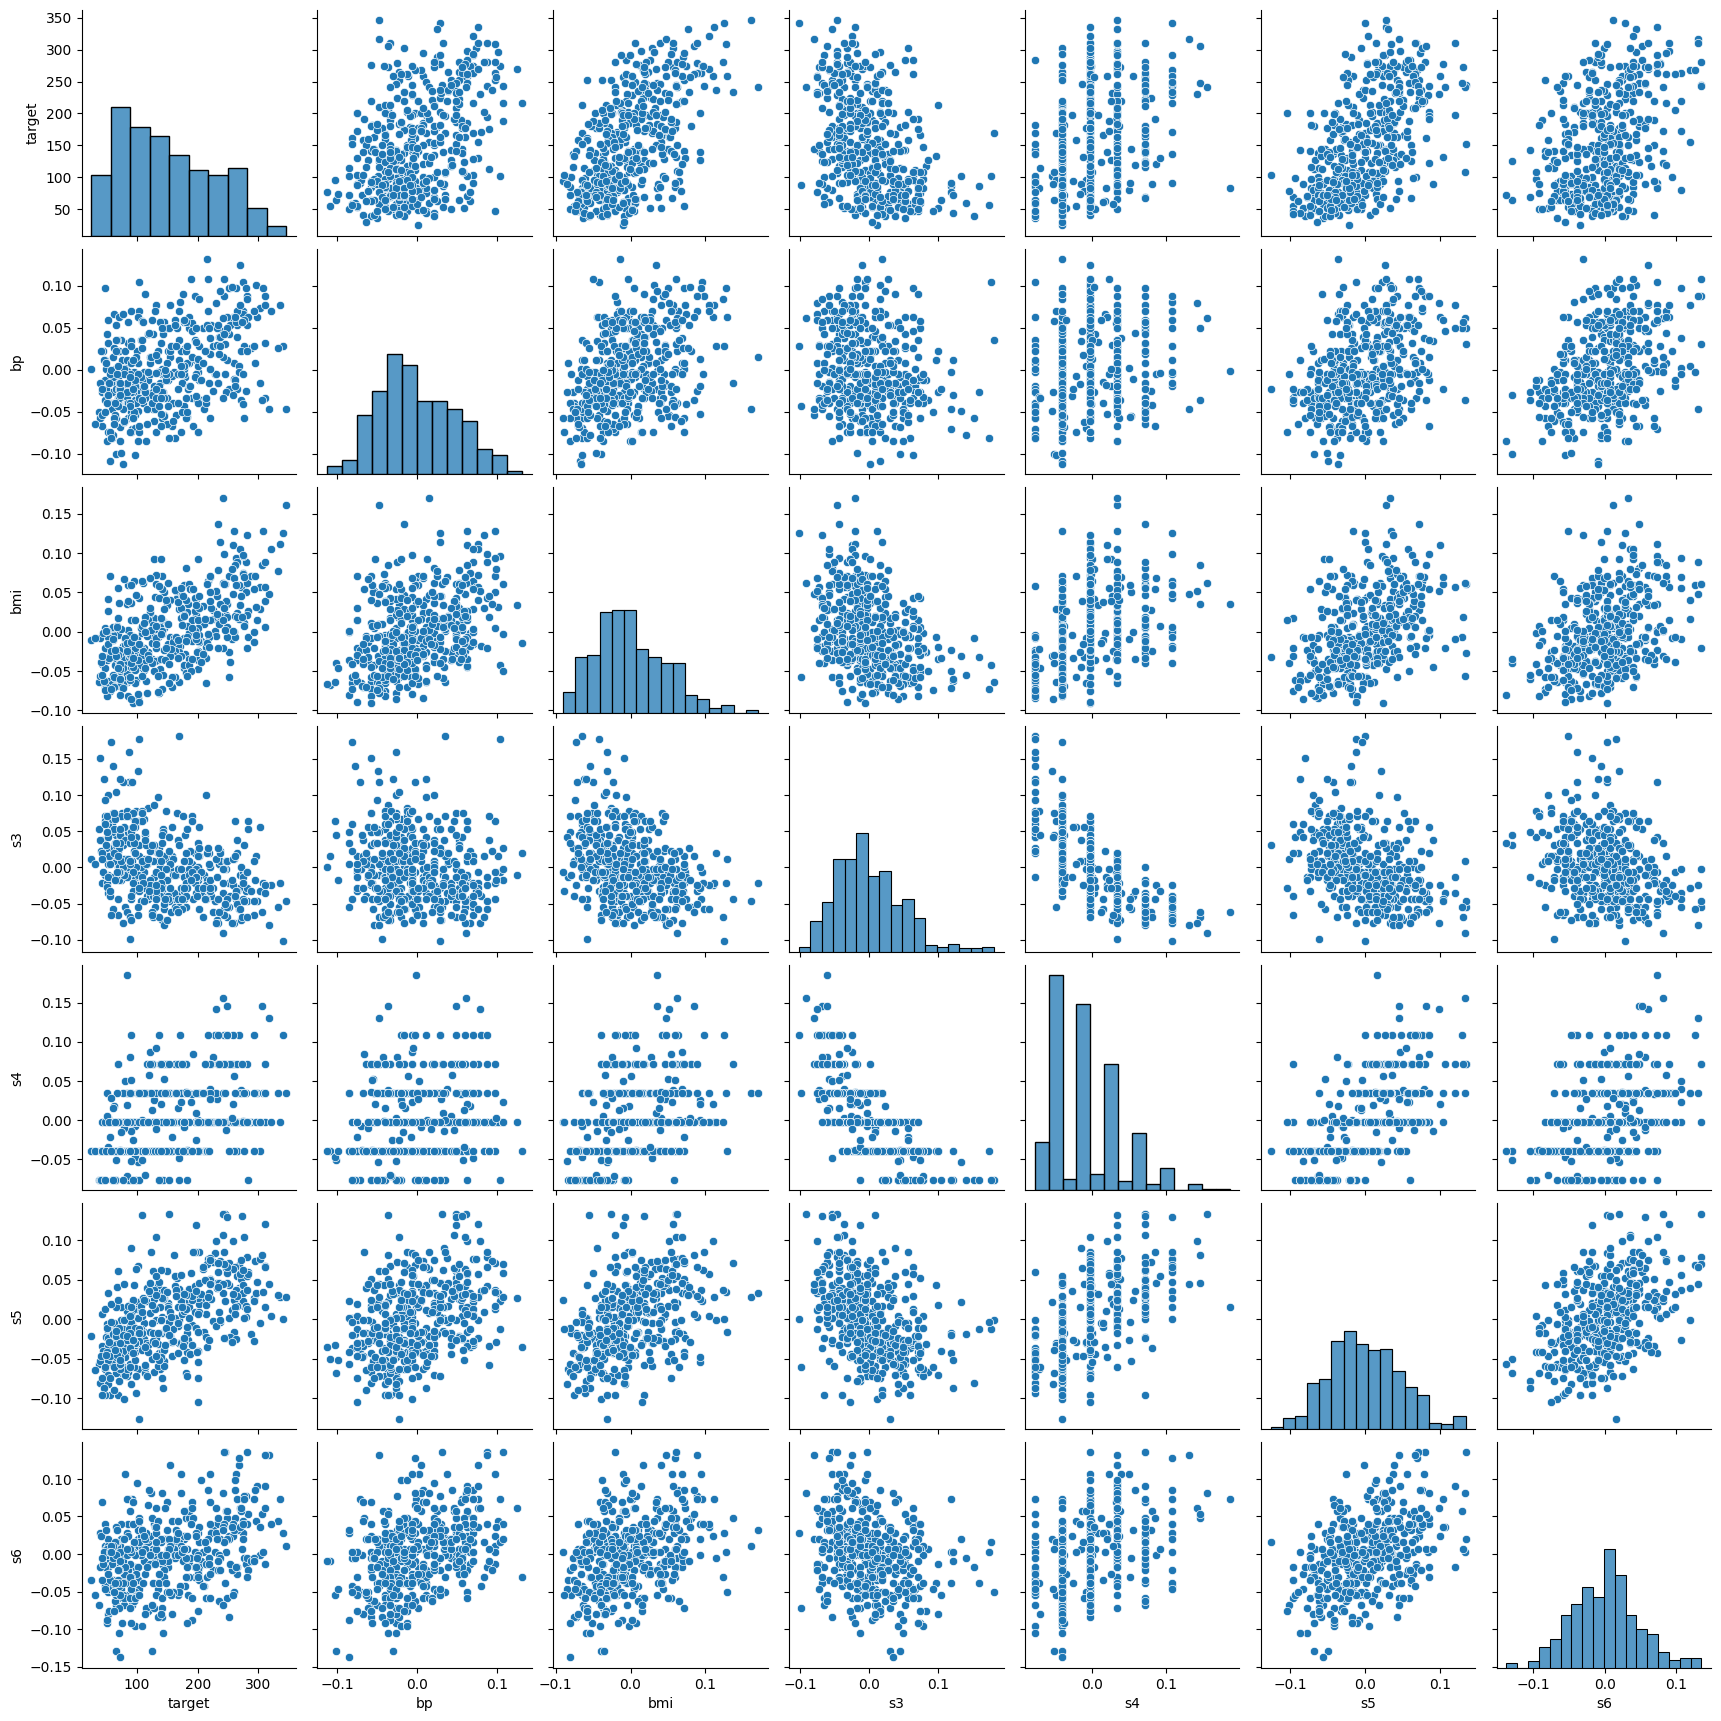

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(df[["target","bp", "bmi", "s3","s4", "s5", "s6"]])
plt.show()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [5]:
from sklearn.model_selection import train_test_split
X_data = df.loc[:,['bp', 'bmi', 's3', 's5', 's6']]
y_data = df.loc[:, 'target']
x_train, x_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, shuffle=True, random_state=12)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(353, 5) (353,)
(89, 5) (89,)


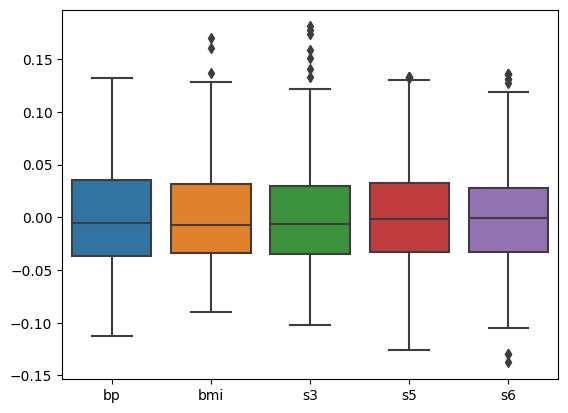

In [6]:
plt.figure()
sns.boxplot(data=X_data)
plt.show()
plt.close()

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df_scaled = X_data.iloc[:,:-1]
scaler.fit(df_scaled)
df_scaled = scaler.transform(df_scaled)
X_data.iloc[:,:-1] = df_scaled[:,:]
print(X_data.head())

         bp       bmi        s3        s5        s6
0  0.549296  0.582645  0.207792  0.562217 -0.017646
1  0.352113  0.148760  0.623377  0.222443 -0.092204
2  0.436620  0.516529  0.246753  0.496584 -0.025930
3  0.309859  0.301653  0.233766  0.572936 -0.009362
4  0.549296  0.206612  0.389610  0.362369 -0.046641


In [8]:
x_train, x_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, shuffle=True, random_state=12)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(353, 5) (353,)
(89, 5) (89,)


In [9]:
from sklearn.linear_model import LinearRegression
import numpy as np
lr = LinearRegression()
lr.fit(x_train, y_train)
print("회귀계수(기울기):", np.round(lr.coef_, 1))
print("상수항(절편):", np.round(lr.intercept_, 1))

회귀계수(기울기): [ 67.2 146.1 -55.4 118.5  69.6]
상수항(절편): 34.2


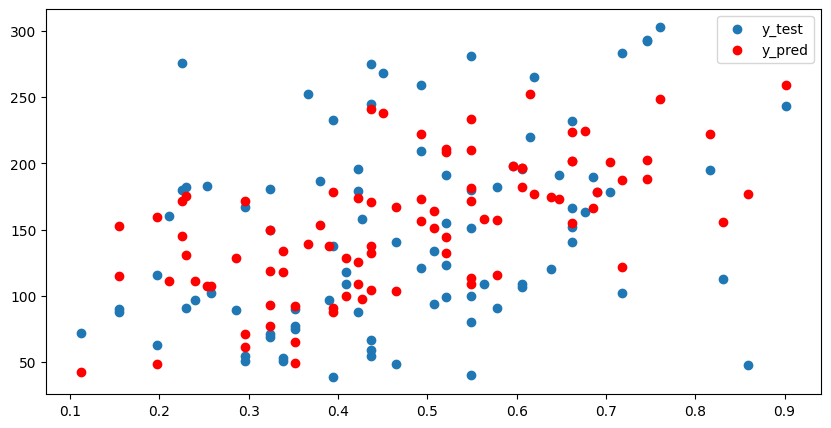

In [10]:
y_test_pred = lr.predict(x_test)
plt.figure(figsize=(10,5)) 
plt.scatter(x_test['bp'], y_test, label='y_test')
plt.scatter(x_test['bp'], y_test_pred, c='r', label='y_pred')
plt.legend(loc='best')
plt.show()

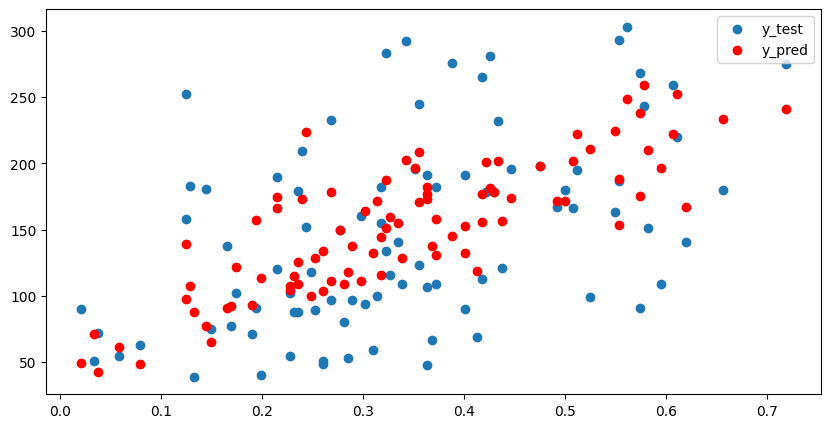

In [11]:
y_test_pred = lr.predict(x_test)
plt.figure(figsize=(10,5)) 
plt.scatter(x_test['bmi'], y_test, label='y_test')
plt.scatter(x_test['bmi'], y_test_pred, c='r', label='y_pred')
plt.legend(loc='best')
plt.show()

In [12]:
from sklearn.metrics import mean_squared_error
y_train_pred = lr.predict(x_train)

train_mse = mean_squared_error(y_train, y_train_pred)
print("Train MSE:%3f" % train_mse)

test_mse = mean_squared_error(y_test, y_test_pred)
print("Test MSE: %3f" % test_mse)

Train MSE:2960.264346
Test MSE: 3256.747902


In [13]:
from sklearn.model_selection import cross_val_score
lr = LinearRegression()
mse_score = -1*cross_val_score(lr, x_train, y_train, cv=5, scoring='neg_mean_squared_error')
print("개별 Fold의 MSE:", np.round(mse_score, 4))
print("평균 MSE:%4f" % np.mean(mse_score))

개별 Fold의 MSE: [3370.3743 3105.7896 3094.6807 3741.3106 2388.1898]
평균 MSE:3140.069009


In [14]:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree=2)
x_train_poly = pf.fit_transform(x_train)
print("원본 학습 데이터 셋:", x_train.shape) # 2개인 이유 LATST, RM 이 두가지 값을 가지기 때문이고
print("2차 다항식 변환 데이터 셋:", x_train_poly.shape)

원본 학습 데이터 셋: (353, 5)
2차 다항식 변환 데이터 셋: (353, 21)


In [15]:
# 2차 다항식 변환 데이터셋으로 선형 회귀 모델 모형 학습
lr = LinearRegression()
lr.fit(x_train_poly, y_train) # y_train은 실제 결과값

# 테스트 데이터에 대한 예측 밒 평가
y_train_pred = lr.predict(x_train_poly)
train_mse = mean_squared_error(y_train, y_train_pred)
print("Train MSE:%3f" % train_mse)

x_test_poly = pf.fit_transform(x_test) # 학습한 예측결과랑 test값의 예측 결과 파악
y_test_pred = lr.predict(x_test_poly)
test_mse = mean_squared_error(y_test, y_test_pred)
print("Test MSE:%3f" % test_mse)

Train MSE:2733.790822
Test MSE:3479.310458


In [16]:
# 15차 다항식 변환 데이터셋으로 선형 회귀 모형 학습
pf = PolynomialFeatures(degree=15)
x_train_poly = pf.fit_transform(x_train)

lr = LinearRegression()
lr.fit(x_train_poly, y_train)

# 테스트 데이터에 대한 예측 및 평가
y_train_pred = lr.predict(x_train_poly)
train_mse = mean_squared_error(y_train, y_train_pred)
print("Train MSE: %.3f" % train_mse)

x_test_poly = pf.fit_transform(x_test)
y_test_pred = lr.predict(x_test_poly)
test_mse = mean_squared_error(y_test, y_test_pred)
print("Test MSE:%.4f" % test_mse)

Train MSE: 0.000
Test MSE:42545718.7471


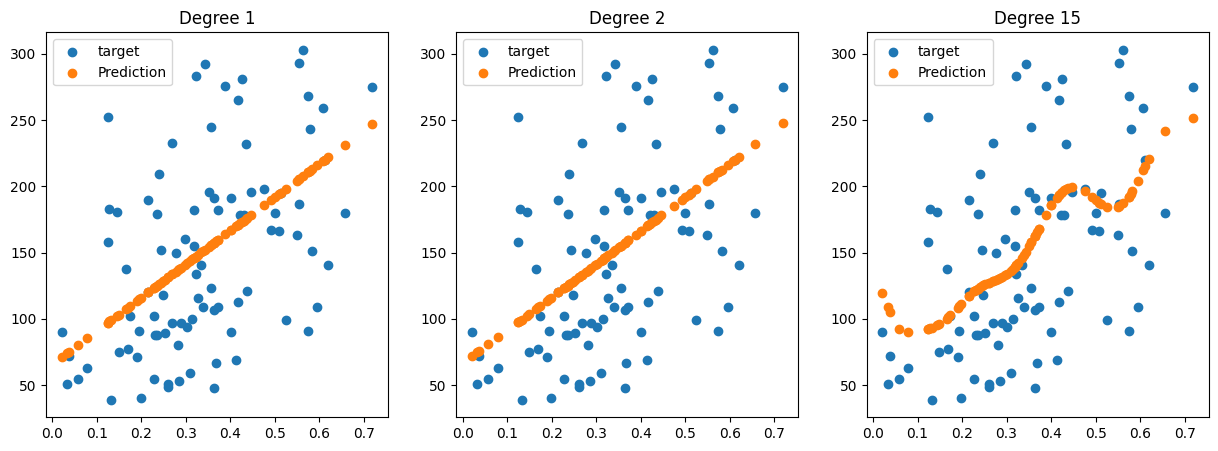

In [17]:
# 다항식 차수에 따른 모델 적합도 변화
plt.figure(figsize=(15,5))
for n, deg in enumerate([1, 2, 15]):
    axl = plt.subplot(1,3, n+1)
    # plt.axis('off')
    # degree별 다항 회귀 모형 적용
    pf = PolynomialFeatures(degree=deg)
    x_train_poly = pf.fit_transform(x_train.loc[:,['bmi']])
    x_test_poly = pf.fit_transform(x_test.loc[:, ['bmi']])
    lr = LinearRegression()
    lr.fit(x_train_poly, y_train)
    y_test_pred = lr.predict(x_test_poly)
    # 실제값 분포
    plt.scatter(x_test.loc[:,['bmi']], y_test, label='target')
    # 예측값 분포
    plt.scatter(x_test.loc[:,['bmi']], y_test_pred, label='Prediction')
    # 제목 표시
    plt.title("Degree %d" % deg)
    # 범례 표시
    plt.legend()
plt.show()

In [18]:
# 의사결정나무
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(max_depth=3, random_state=12)
dtr.fit(x_train, y_train)

y_train_pred = dtr.predict(x_train)
train_mse = mean_squared_error(y_train, y_train_pred)
print("Train MSE:%.4f" % train_mse)

y_test_pred = dtr.predict(x_test)
test_mse = mean_squared_error(y_test, y_test_pred)
print("Test MSE:%.4f" % test_mse)

Train MSE:2898.9794
Test MSE:3936.8650


In [19]:
# 랜덤 포레스트
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(max_depth=3, random_state=12)
rfr.fit(x_train, y_train)

y_train_pred = rfr.predict(x_train)
train_mse = mean_squared_error(y_train, y_train_pred)
print("Train MSE:%.4f" % train_mse)

y_test_pred = rfr.predict(x_test)
test_mse = mean_squared_error(y_test, y_test_pred)
print("Test MSE:%.4f" % test_mse)

Train MSE:2484.8757
Test MSE:3217.6834


In [20]:
print(x_train.corr())

           bp       bmi        s3        s5        s6
bp   1.000000  0.398810 -0.221092  0.396756  0.375386
bmi  0.398810  1.000000 -0.387133  0.447054  0.396421
s3  -0.221092 -0.387133  1.000000 -0.431382 -0.287004
s5   0.396756  0.447054 -0.431382  1.000000  0.473842
s6   0.375386  0.396421 -0.287004  0.473842  1.000000


In [21]:
import pandas as pd
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = sns.load_dataset('taxis')
df

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6428,2019-03-31 09:51:53,2019-03-31 09:55:27,1,0.75,4.5,1.06,0.0,6.36,green,credit card,East Harlem North,Central Harlem North,Manhattan,Manhattan
6429,2019-03-31 17:38:00,2019-03-31 18:34:23,1,18.74,58.0,0.00,0.0,58.80,green,credit card,Jamaica,East Concourse/Concourse Village,Queens,Bronx
6430,2019-03-23 22:55:18,2019-03-23 23:14:25,1,4.14,16.0,0.00,0.0,17.30,green,cash,Crown Heights North,Bushwick North,Brooklyn,Brooklyn
6431,2019-03-04 10:09:25,2019-03-04 10:14:29,1,1.12,6.0,0.00,0.0,6.80,green,credit card,East New York,East Flatbush/Remsen Village,Brooklyn,Brooklyn


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   pickup           6433 non-null   datetime64[ns]
 1   dropoff          6433 non-null   datetime64[ns]
 2   passengers       6433 non-null   int64         
 3   distance         6433 non-null   float64       
 4   fare             6433 non-null   float64       
 5   tip              6433 non-null   float64       
 6   tolls            6433 non-null   float64       
 7   total            6433 non-null   float64       
 8   color            6433 non-null   object        
 9   payment          6389 non-null   object        
 10  pickup_zone      6407 non-null   object        
 11  dropoff_zone     6388 non-null   object        
 12  pickup_borough   6407 non-null   object        
 13  dropoff_borough  6388 non-null   object        
dtypes: datetime64[ns](2), float64(5), int64(

In [23]:
df = df.drop(['pickup', 'dropoff','pickup_zone', 'dropoff_zone', 'pickup_borough', 'dropoff_borough'], axis=1)
df

,passengers,distance,fare,tip,tolls,total,color,payment
0,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card
1,1,0.79,5.0,0.00,0.0,9.30,yellow,cash
2,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card
3,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card
4,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card
...,...,...,...,...,...,...,...,...
6428,1,0.75,4.5,1.06,0.0,6.36,green,credit card
6429,1,18.74,58.0,0.00,0.0,58.80,green,credit card
6430,1,4.14,16.0,0.00,0.0,17.30,green,cash
6431,1,1.12,6.0,0.00,0.0,6.80,green,credit card


In [24]:
df['payment'] = df['payment'].apply(lambda x : 1 if x == 'credit card' else 2)
df['color'] = df['color'].apply(lambda x : 1 if x == 'yellow' else 2)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   passengers  6433 non-null   int64  
 1   distance    6433 non-null   float64
 2   fare        6433 non-null   float64
 3   tip         6433 non-null   float64
 4   tolls       6433 non-null   float64
 5   total       6433 non-null   float64
 6   color       6433 non-null   int64  
 7   payment     6433 non-null   int64  
dtypes: float64(5), int64(3)
memory usage: 402.2 KB


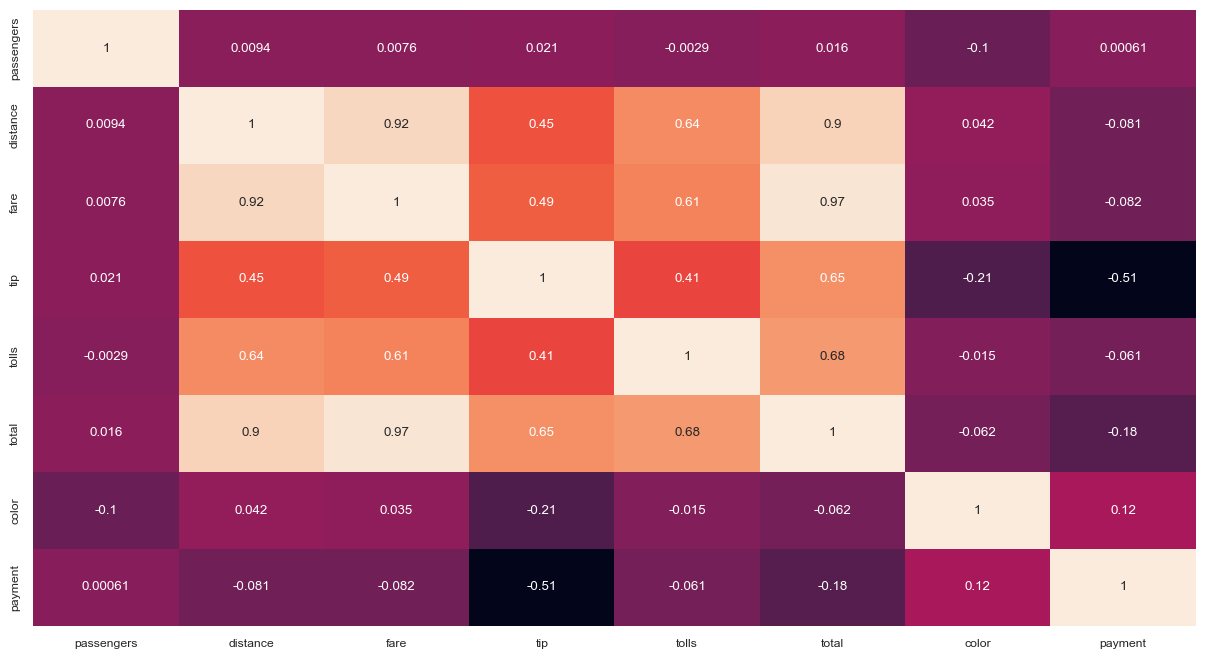

In [26]:
plt.figure(figsize=(15,8))
sns.set(font_scale=0.8)
sns.heatmap(df.corr(), annot=True, cbar=False);
plt.show()

In [27]:
# tolls, tip, fare, distance
x_train = df[['tolls', 'tip', 'fare', 'distance']]
y_train = df[['total']]
print(x_train.shape, y_train.shape)

(6433, 4) (6433, 1)


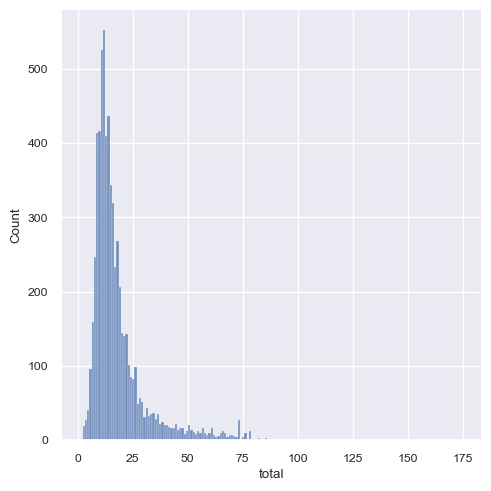

In [28]:
sns.displot(x='total', kind='hist', data=df)
plt.show()

In [29]:
df.columns = ['passengers', 'distance', 'fare', 'tip', 'tolls', 'total', 'color', 'payment']
df.head()

,passengers,distance,fare,tip,tolls,total,color,payment
0,1,1.60,7.0,2.15,0.0,12.95,1,1
1,1,0.79,5.0,0.00,0.0,9.30,1,2
2,1,1.37,7.5,2.36,0.0,14.16,1,1
3,1,7.70,27.0,6.15,0.0,36.95,1,1
4,3,2.16,9.0,1.10,0.0,13.40,1,1


In [30]:
# tolls, tip, fare, distance
x_train = df[['tolls', 'tip', 'fare', 'distance']]
y_train = df[['total']]
print(x_train.shape, y_train.shape)

(6433, 4) (6433, 1)


In [31]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, shuffle=True, random_state=12)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(5146, 4) (5146, 1)
(1287, 4) (1287, 1)


In [32]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
print("회귀계수(기울기):", np.round(lr.coef_, 4))
print("상수항(절편):", np.round(lr.intercept_, 4))

회귀계수(기울기): [[ 1.0185  1.1726  0.97   -0.0094]]
상수항(절편): [3.199]


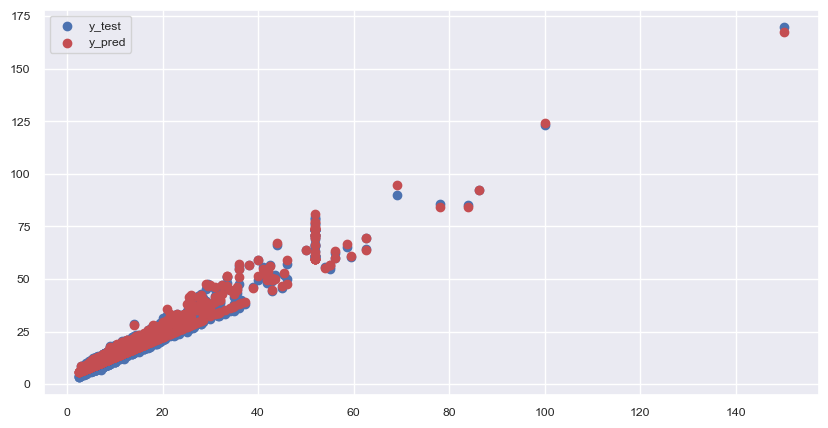

In [33]:
# 예측
y_test_pred = lr.predict(x_test)

# 예측값 실제값의 분포
plt.figure(figsize=(10,5)) # 그림또는 도표로 나타내기
plt.scatter(x_test['fare'], y_test, label='y_test')
plt.scatter(x_test['fare'], y_test_pred, c='r', label='y_pred')
plt.legend(loc='best')
plt.show()

In [34]:
# 평가
from sklearn.metrics import mean_squared_error
y_train_pred = lr.predict(x_train)

train_mse = mean_squared_error(y_train, y_train_pred)
print("Train MSE:%3f" % train_mse)

test_mse = mean_squared_error(y_test, y_test_pred)
print("Test MSE: %3f" % test_mse)

Train MSE:1.136199
Test MSE: 1.187184


In [35]:
# cross_val-score 함수
from sklearn.model_selection import cross_val_score
lr = LinearRegression()
mse_score = -1*cross_val_score(lr, x_train, y_train, cv=5, scoring='neg_mean_squared_error')
print("개별 Fold의 MSE:", np.round(mse_score, 4))
print("평균 MSE:%4f" % np.mean(mse_score))

개별 Fold의 MSE: [1.16   1.1562 1.1205 1.1224 1.1434]
평균 MSE:1.140502


In [38]:
y_train.value_counts()

total 
9.30      113
11.30     103
10.30      97
11.80      96
9.80       95
         ... 
27.04       1
27.00       1
26.62       1
26.56       1
174.82      1
Name: count, Length: 795, dtype: int64